In [2]:
import pulp
import pandas as pd
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
import time
import copy
import numpy as np
from scipy.spatial import distance_matrix
import math
import pyomo.environ as pyo            
import sys

### Trivial Solution

In [4]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple

Point = namedtuple("Point", ['x', 'y'])

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))

    # build a trivial solution
    # visit the nodes in the order they appear in the file
    solution = range(0, nodeCount)

    # calculate the length of the tour
    obj = length(points[solution[-1]], points[solution[0]])
    for index in range(0, nodeCount-1):
        obj += length(points[solution[index]], points[solution[index+1]])

    # prepare the solution in the specified output format
    output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, solution))

    return output_data


import sys

if __name__ == '__main__':
    # import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        file_location = ".\\data\\tsp_51_1"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


1313.47 0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50


### Greedy Solution 

In [10]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple

Point = namedtuple("Point", ['x', 'y'])

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def distance_matrix(coordinates):
    output= np.zeros((len(coordinates),len(coordinates)))
    num_rows, num_cols = output.shape
    for row in range(num_rows):
        for col in range(num_cols):
            if row==col:continue
            output[row][col]=length(coordinates[row], coordinates[col])
    return output

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    dist_matrix=distance_matrix(points)
    # print(dist_matrix)

    #Greedy Solution
    pending_visit= [i for i in range(1,nodeCount)]
    tour ="0 " #starting from first city
    tour_list=[0]
    current_city = 0
    while len(pending_visit)>0:
        next_city=dist_matrix[current_city].tolist().index(sorted(dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
        dist_matrix[current_city][next_city]=100000
        tour+=str(next_city)+" "
        tour_list.append(next_city)
        pending_visit.remove(next_city)
    tour=tour[:-1]

    solution = tour_list

    # calculate the length of the tour
    obj = length(points[solution[-1]], points[solution[0]])
    for index in range(0, nodeCount-1):
        obj += length(points[solution[index]], points[solution[index+1]])

    # prepare the solution in the specified output format
    output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    # output_data += ' '.join(map(str, solution))
    output_data+=tour

    return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        # file_location = ".\\data\\tsp_51_1"
        file_location = ".\\data\\tsp_10_1.txt"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


196.42 0
0 5 2 1 6 9 3 8 4 7


### 2-OPT

In [30]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple

Point = namedtuple("Point", ['x', 'y'])

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def distance_matrix(coordinates):
    output= np.zeros((len(coordinates),len(coordinates)))
    num_rows, num_cols = output.shape
    for row in range(num_rows):
        for col in range(num_cols):
            if row==col:continue
            output[row][col]=length(coordinates[row], coordinates[col])
    return output

def arc_length_finder(arcs,points):
    length_list=[]
    for arc in arcs:
        length_list.append(length(points[arc[0]],points[arc[1]]))
    # print(length_list)
    return length_list

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    dist_matrix=distance_matrix(points)
    print(dist_matrix)

    #Greedy Solution
    pending_visit= [i for i in range(1,nodeCount)]
    tour ="0 " #starting from first city
    tour_list=[0]
    current_city = 0
    while len(pending_visit)>0:
        next_city=dist_matrix[current_city].tolist().index(sorted(dist_matrix[current_city])[1]) #minimum distance excluding distance to itself 
        dist_matrix[current_city][next_city]=100000
        tour+=str(next_city)+" "
        tour_list.append(next_city)
        pending_visit.remove(next_city)
    tour=tour[:-1]
    # print(tour)

    solution = tour_list
    tour_list.append(0)

    #First Feasible Solution 
    arcs = list(zip(tour_list[:-1:1], tour_list[1::1]))
    arc_lengths=arc_length_finder(arcs,points)
    print(arcs)
    print(arc_lengths)
    print("SUM arc lengths - ",sum(arc_lengths) )
    # print(points)

    # calculate the length of the tour
    obj = length(points[solution[-1]], points[solution[0]])
    for index in range(0, nodeCount-1):
        obj += length(points[solution[index]], points[solution[index+1]])

    # prepare the solution in the specified output format
    output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    # output_data += ' '.join(map(str, solution))
    output_data+=tour

    return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        # file_location = ".\\data\\tsp_51_1"
        file_location = ".\\data\\tsp_10_1.txt"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


[[ 0.         20.22374842 16.03121954 36.89173349 51.4003891  10.04987562
  24.59674775 61.03277808 48.7954916  35.35533906]
 [20.22374842  0.         23.02172887 28.         35.         22.13594362
   8.24621125 41.23105626 34.43835072 35.34119409]
 [16.03121954 23.02172887  0.         24.20743687 42.72001873  6.32455532
  21.58703314 57.07889277 38.47076812 19.41648784]
 [36.89173349 28.         24.20743687  0.         21.         29.69848481
  20.09975124 39.84971769 15.29705854 15.5241747 ]
 [51.4003891  35.         42.72001873 21.          0.         46.95742753
  27.58622845 20.80865205  6.70820393 36.22154055]
 [10.04987562 22.13594362  6.32455532 29.69848481 46.95742753  0.
  23.02172887 59.68249325 43.26661531 25.70992026]
 [24.59674775  8.24621125 21.58703314 20.09975124 27.58622845 23.02172887
   0.         36.87817783 26.41968963 29.41088234]
 [61.03277808 41.23105626 57.07889277 39.84971769 20.80865205 59.68249325
  36.87817783  0.         27.45906044 55.36244214]
 [48.795

### MILP Model - pywraplp

In [35]:
from ortools.linear_solver import pywraplp

lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

solver =pywraplp.Solver.CreateSolver('SCIP')
# solver =pywraplp.Solver.CreateSolver('gurobi')

num_cities = 5

# Decision Variables for route selection - 1 if route i to j is selected, 0 otherwise 
x={}
for i in range (num_cities):
    for j in range(num_cities):
        if i==j: continue
        x[i,j]=solver.NumVar(0, 1, f"x[{i},{j}]")


#Constraints
#1. Each city should have only one departure
for i in range(num_cities):
    expr=[]
    for j in range(num_cities):
        if i==j: continue
        expr.append(x[i,j])
    print(expr)
    solver.Add(sum(expr) <= 1)
    solver.Add(sum(expr) >= 1)

#2. Each city should have only one arrival
for i in range(num_cities):
    expr=[]
    for j in range(num_cities):
        if i==j: continue
        expr.append(x[j,i])
    print(expr)
    solver.Add(sum(expr) <= 1)
    solver.Add(sum(expr) >= 1)

# Objective 
objective_terms=[]
for i in range(num_cities):
    for j in range(num_cities):
        if i==j:continue
        objective_terms.append(x[i,j]*length(points[i],points[j]))
        # print(points[i],points[j],length(points[i],points[j]))
# print(objective_terms)
        
solver.Minimize(solver.Sum(objective_terms))
status =solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print ('Minimum distance = ', solver.Objective().Value())

    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            if x[i,j].solution_value() ==1:
                print (x[i,j])
                
else:
    print ('The problem does not have an optimal solution')




[x[0,1], x[0,2], x[0,3], x[0,4]]
[x[1,0], x[1,2], x[1,3], x[1,4]]
[x[2,0], x[2,1], x[2,3], x[2,4]]
[x[3,0], x[3,1], x[3,2], x[3,4]]
[x[4,0], x[4,1], x[4,2], x[4,3]]
[x[1,0], x[2,0], x[3,0], x[4,0]]
[x[0,1], x[2,1], x[3,1], x[4,1]]
[x[0,2], x[1,2], x[3,2], x[4,2]]
[x[0,3], x[1,3], x[2,3], x[4,3]]
[x[0,4], x[1,4], x[2,4], x[3,4]]
Minimum distance =  4.0
x[0,4]
x[1,0]
x[2,1]
x[3,2]
x[4,3]


### MILP Solution - Solve_it() - No Subtour Elimination 

Minimum distance =  16743.672623167637
None


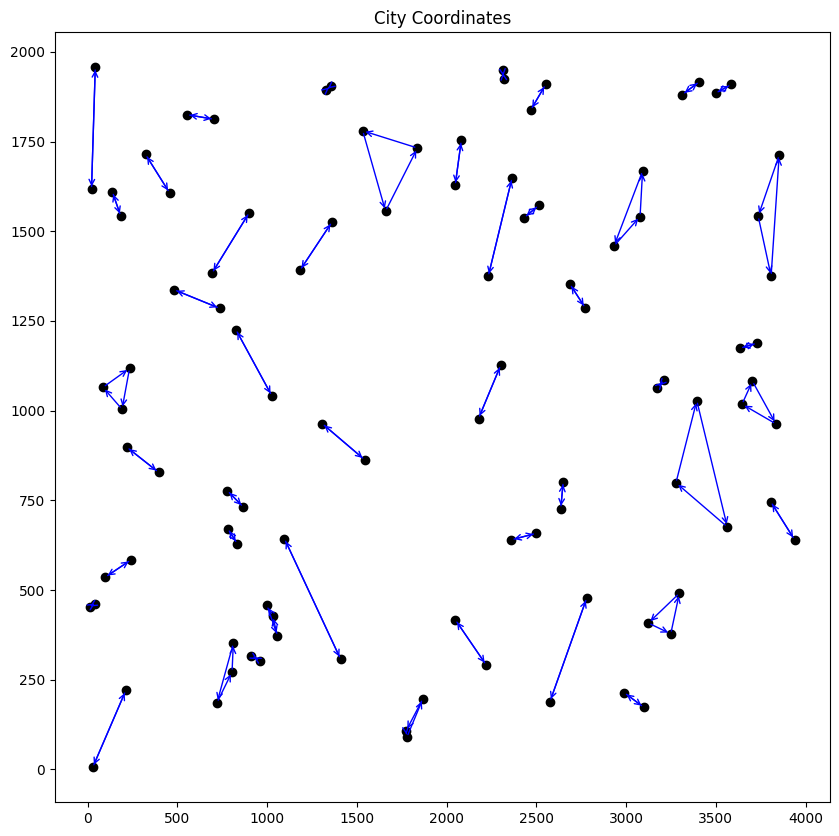

In [49]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple
from ortools.linear_solver import pywraplp

Point = namedtuple("Point", ['x', 'y'])

def plot_fig(loc,heading="City Coordinates"):
    plt.figure(figsize=(10,10))
    x=[]
    y=[]
    for city in loc:
        # print (city)
        # x.append(float(city[0]))
        # y.append(float(city[1]))
        x.append(float(city.x))
        y.append(float(city.y))
        plt.title(heading)
    plt.scatter(np.array(x),np.array(y),c='black')
        # break

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    # print (points)
    plot_fig(points)

    solver =pywraplp.Solver.CreateSolver('SCIP')

    num_cities = len(points)
    
    # Decision Variables for route selection - 1 if route i to j is selected, 0 otherwise 
    x={}
    for i in range (num_cities):
        for j in range(num_cities):
            if i==j: continue
            x[i,j]=solver.NumVar(0, 1, f"x[{i},{j}]")
    
    
    #Constraints
    #1. Each city should have only one departure
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[i,j])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)
    
    #2. Each city should have only one arrival
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[j,i])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)
    
    # Objective 
    objective_terms=[]
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            objective_terms.append(x[i,j]*length(points[i],points[j]))
            # print(points[i],points[j],length(points[i],points[j]))
    # print(objective_terms)
            
    solver.Minimize(solver.Sum(objective_terms))
    status =solver.Solve()

    result = []
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            if x[i,j].solution_value() ==1:
                result.append((i,j))

    #Visualising Output 
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
    for i, j in result:
        # plt.annotate('', xy=[float(city_data[int(j)][0]), float(city_data[int(j)][1])], xytext=[float(city_data[int(i)][0]), float(city_data[int(i)][1])]
        plt.annotate('', xy=[float(points[int(j)].x), float(points[int(j)].y)], xytext=[float(points[int(i)].x), float(points[int(i)].y)], arrowprops=arrowprops)

    print ('Minimum distance = ', solver.Objective().Value())
    # # prepare the solution in the specified output format
    # output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    # output_data += ' '.join(map(str, solution))
    # return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        file_location = ".\\data\\tsp_100_3"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


### Building Subtour elimnation constraint

In [69]:
import itertools
a=[i for i in range(5)]
# print(a)
subset=[]
for i in range (2,len(a)):
    subset.extend(itertools.combinations(a, i))
subset
tour_combin = list(itertools.combinations(subset, 2))
for tour1, tour2 in tour_combin:
    print (tour1, tour2)
    expr=[]
    for i in tour1:
        for j in tour2:
            expr.append(x[i,j])'
    solver.Add(sum(expr) >= 1)
            
            # print (i,j)
            

(0, 1) (0, 2)
(0, 1) (0, 3)
(0, 1) (0, 4)
(0, 1) (1, 2)
(0, 1) (1, 3)
(0, 1) (1, 4)
(0, 1) (2, 3)
(0, 1) (2, 4)
(0, 1) (3, 4)
(0, 1) (0, 1, 2)
(0, 1) (0, 1, 3)
(0, 1) (0, 1, 4)
(0, 1) (0, 2, 3)
(0, 1) (0, 2, 4)
(0, 1) (0, 3, 4)
(0, 1) (1, 2, 3)
(0, 1) (1, 2, 4)
(0, 1) (1, 3, 4)
(0, 1) (2, 3, 4)
(0, 1) (0, 1, 2, 3)
(0, 1) (0, 1, 2, 4)
(0, 1) (0, 1, 3, 4)
(0, 1) (0, 2, 3, 4)
(0, 1) (1, 2, 3, 4)
(0, 2) (0, 3)
(0, 2) (0, 4)
(0, 2) (1, 2)
(0, 2) (1, 3)
(0, 2) (1, 4)
(0, 2) (2, 3)
(0, 2) (2, 4)
(0, 2) (3, 4)
(0, 2) (0, 1, 2)
(0, 2) (0, 1, 3)
(0, 2) (0, 1, 4)
(0, 2) (0, 2, 3)
(0, 2) (0, 2, 4)
(0, 2) (0, 3, 4)
(0, 2) (1, 2, 3)
(0, 2) (1, 2, 4)
(0, 2) (1, 3, 4)
(0, 2) (2, 3, 4)
(0, 2) (0, 1, 2, 3)
(0, 2) (0, 1, 2, 4)
(0, 2) (0, 1, 3, 4)
(0, 2) (0, 2, 3, 4)
(0, 2) (1, 2, 3, 4)
(0, 3) (0, 4)
(0, 3) (1, 2)
(0, 3) (1, 3)
(0, 3) (1, 4)
(0, 3) (2, 3)
(0, 3) (2, 4)
(0, 3) (3, 4)
(0, 3) (0, 1, 2)
(0, 3) (0, 1, 3)
(0, 3) (0, 1, 4)
(0, 3) (0, 2, 3)
(0, 3) (0, 2, 4)
(0, 3) (0, 3, 4)
(0, 3) (1, 2, 3)
(0, 3

### MILP Solution - Solve_it() - With Subtour Elimination 

MemoryError: 

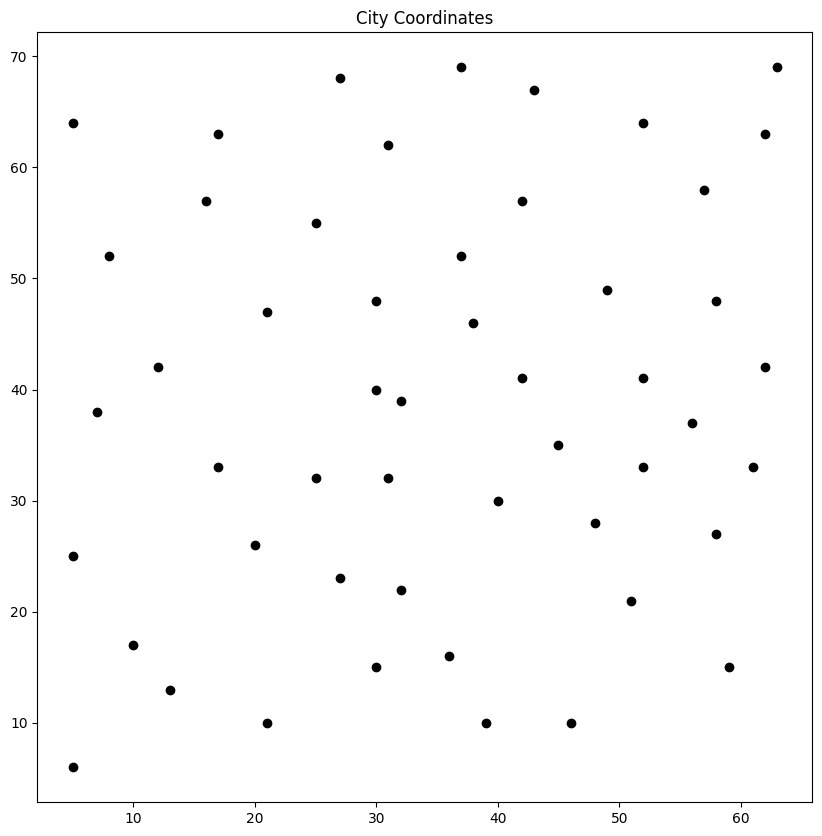

In [6]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple
from ortools.linear_solver import pywraplp
import itertools
from matplotlib import pyplot as plt
import numpy as np

Point = namedtuple("Point", ['x', 'y'])

def plot_fig(loc,heading="City Coordinates"):
    plt.figure(figsize=(10,10))
    x=[]
    y=[]
    for city in loc:
        # print (city)
        # x.append(float(city[0]))
        # y.append(float(city[1]))
        x.append(float(city.x))
        y.append(float(city.y))
        plt.title(heading)
    plt.scatter(np.array(x),np.array(y),c='black')
        # break

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    # print (points)
    plot_fig(points)

    solver =pywraplp.Solver.CreateSolver('SCIP')

    num_cities = len(points)
    
    # Decision Variables for route selection - 1 if route i to j is selected, 0 otherwise 
    x={}
    for i in range (num_cities):
        for j in range(num_cities):
            if i==j: continue
            x[i,j]=solver.NumVar(0, 1, f"x[{i},{j}]")
    
    
    #Constraints
    #1. Each city should have only one departure
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[i,j])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)
    
    #2. Each city should have only one arrival
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[j,i])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)


    #Subtour Elimination Constraints
    a=[i for i in range(num_cities)]
    # print(a)
    subset=[]
    for i in range (2,len(a)):
        subset.extend(itertools.combinations(a, i))
    tour_combin = list(itertools.combinations(subset, 2))
    for tour1, tour2 in tour_combin:
        print (tour1, tour2)
        expr=[]
        for i in tour1:
            for j in tour2:
                expr.append(x[i,j])
        solver.Add(sum(expr) >= 1)
        
    # Objective 
    objective_terms=[]
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            objective_terms.append(x[i,j]*length(points[i],points[j]))
            # print(points[i],points[j],length(points[i],points[j]))
    # print(objective_terms)
            
    solver.Minimize(solver.Sum(objective_terms))
    status =solver.Solve()

    result = []
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            if x[i,j].solution_value() ==1:
                result.append((i,j))

    #Visualising Output 
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
    for i, j in result:
        # plt.annotate('', xy=[float(city_data[int(j)][0]), float(city_data[int(j)][1])], xytext=[float(city_data[int(i)][0]), float(city_data[int(i)][1])]
        plt.annotate('', xy=[float(points[int(j)].x), float(points[int(j)].y)], xytext=[float(points[int(i)].x), float(points[int(i)].y)], arrowprops=arrowprops)

    print ('Minimum distance = ', solver.Objective().Value())
    # # prepare the solution in the specified output format
    # output_data = '%.2f' % obj + ' ' + str(0) + '\n'
    # output_data += ' '.join(map(str, solution))
    # return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        file_location = ".\\data\\tsp_51_1"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


Number of Subsets = 2^n -2 - n

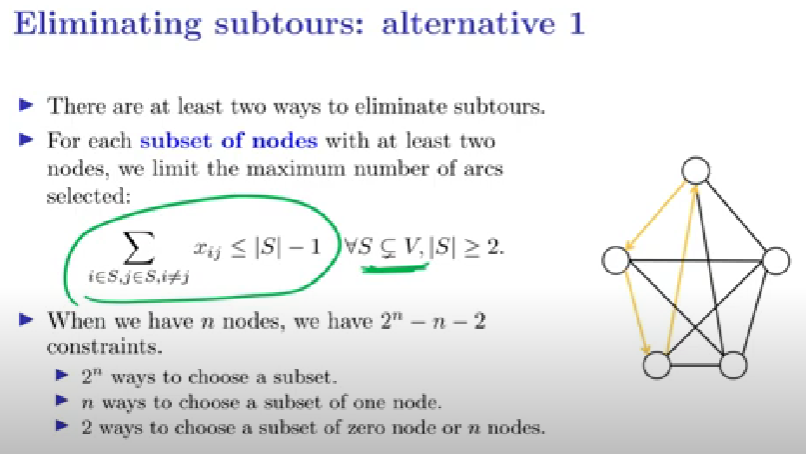

### MILP Solution - Solve_it() - MTZ Subtour Elimination 

[(0, 33), (1, 31), (2, 5), (3, 45), (4, 8), (5, 0), (6, 36), (7, 13), (8, 46), (9, 10), (10, 28), (11, 42), (12, 30), (13, 35), (14, 44), (15, 14), (16, 18), (17, 49), (18, 40), (19, 7), (20, 25), (21, 37), (22, 48), (23, 34), (24, 41), (25, 1), (26, 6), (27, 3), (28, 2), (29, 43), (30, 11), (31, 22), (32, 17), (33, 47), (34, 4), (35, 23), (36, 12), (37, 20), (38, 15), (39, 50), (40, 19), (41, 27), (42, 29), (43, 21), (44, 16), (45, 9), (46, 24), (47, 26), (48, 32), (49, 39), (50, 38)]
Minimum distance =  428.87175639203394
MILP Solution found in: 65.85053062438965 seconds
428.87 1
0 33 47 26 6 36 12 30 11 42 29 43 21 37 20 25 1 31 22 48 32 17 49 39 50 38 15 14 44 16 18 40 19 7 13 35 23 34 4 8 46 24 41 27 3 45 9 10 28 2 5 0


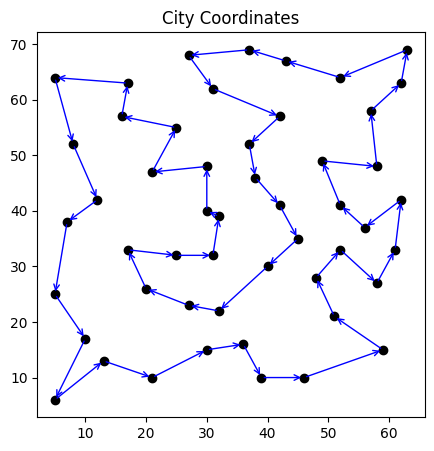

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple
from ortools.linear_solver import pywraplp
import itertools
from matplotlib import pyplot as plt
import numpy as np
import time 

Point = namedtuple("Point", ['x', 'y'])

def plot_fig(loc,heading="City Coordinates"):
    # plt.figure(figsize=(10,10))
    plt.figure(figsize=(5,5))
    x=[]
    y=[]
    for city in loc:
        x.append(float(city.x))
        y.append(float(city.y))
        plt.title(heading)
    plt.scatter(np.array(x),np.array(y),c='black')
        # break

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def route_finder(tour):
    route=""
    current=0
    route+=str(current)+" "
    for i in range(len(tour)):
        for path in tour:
            if path[0]==current:
                next=path[1]
                route+=str(next)+" "
                current=next
                break
    return route[:-1]

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    # print (points)
    plot_fig(points)

    start = time.time()

    solver =pywraplp.Solver.CreateSolver('SCIP')
    # solver = pywraplp.Solver('SolveIntegerProblem',
    #                        pywraplp.Solver.GUROBI_MIXED_INTEGER_PROGRAMMING);

    num_cities = len(points)
    
    # Decision Variables for route selection - 1 if route i to j is selected, 0 otherwise 
    x={}
    for i in range (num_cities):
        for j in range(num_cities):
            if i==j: continue
            x[i,j]=solver.IntVar(0, 1, f"x[{i},{j}]")

    # print(x)
    # Decision Variables for cities visited before that city 
    u={}
    infinity=solver.infinity()
    for i in range (1,num_cities):
        u[i]=solver.NumVar(0,infinity , 'u[%i]'%i)
    # print (u)
    
    #Constraints
    #1. Each city should have only one departure
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[i,j])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)
    
    #2. Each city should have only one arrival
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[j,i])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)

    #3. Subtour Elimination constraint
    for i in range(1,num_cities):
        # expr=[]
        for j in range(1,num_cities):
            if i==j: continue
            solver.Add(u[i]+1 <= u[j] +(num_cities*(1-x[i,j])))
            # expr.append(x[j,i])
        # print(expr)
        # solver.Add(sum(expr) <= 1)
        # solver.Add(sum(expr) >= 1)
    


    # #Subtour Elimination Constraints
    # a=[i for i in range(num_cities)]
    # # print(a)
    # subset=[]
    # for i in range (2,len(a)):
    #     subset.extend(itertools.combinations(a, i))
    # tour_combin = list(itertools.combinations(subset, 2))
    # for tour1, tour2 in tour_combin:
    #     print (tour1, tour2)
    #     expr=[]
    #     for i in tour1:
    #         for j in tour2:
    #             expr.append(x[i,j])
    #     solver.Add(sum(expr) >= 1)
        
    # Objective 
    objective_terms=[]
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            objective_terms.append(x[i,j]*length(points[i],points[j]))
            # print(points[i],points[j],length(points[i],points[j]))
    # print(objective_terms)
            
    solver.Minimize(solver.Sum(objective_terms))
    status =solver.Solve()

    result = []
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            if x[i,j].solution_value() ==1:
            # print (x[i,j].solution_value())
                result.append((i,j))
    print(result)

    #Visualising Output 
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
    for i, j in result:
        # plt.annotate('', xy=[float(city_data[int(j)][0]), float(city_data[int(j)][1])], xytext=[float(city_data[int(i)][0]), float(city_data[int(i)][1])]
        plt.annotate('', xy=[float(points[int(j)].x), float(points[int(j)].y)], xytext=[float(points[int(i)].x), float(points[int(i)].y)], arrowprops=arrowprops)

    print ('Minimum distance = ', solver.Objective().Value())
    print("MILP Solution found in: " + str(time.time() - start) + " seconds")
    # # prepare the solution in the specified output format
    obj = solver.Objective().Value()
    output_data = '%.2f' % obj + ' ' + str(1) + '\n'
    # output_data += ' '.join(map(str, solution))
    output_data +=route_finder(result)
    return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        file_location = ".\\data\\tsp_51_1"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


### Checking input file

In [10]:
file_location = ".\\data\\tsp_51_1"
with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()

    print(input_data)
    lines = input_data.split('\n')

51
27 68
30 48
43 67
58 48
58 27
37 69
38 46
46 10
61 33
62 63
63 69
32 22
45 35
59 15
5 6
10 17
21 10
5 64
30 15
39 10
32 39
25 32
25 55
48 28
56 37
30 40
37 52
49 49
52 64
20 26
40 30
21 47
17 63
31 62
52 33
51 21
42 41
31 32
5 25
12 42
36 16
52 41
27 23
17 33
13 13
57 58
62 42
42 57
16 57
8 52
7 38



### Visualising Input file

[(0, 33), (1, 31), (2, 5), (3, 45), (4, 8), (5, 0), (6, 36), (7, 13), (8, 46), (9, 10), (10, 28), (11, 42), (12, 30), (13, 35), (14, 44), (15, 14), (16, 18), (17, 49), (18, 40), (19, 7), (20, 25), (21, 37), (22, 48), (23, 34), (24, 41), (25, 1), (26, 6), (27, 3), (28, 2), (29, 43), (30, 11), (31, 22), (32, 17), (33, 47), (34, 4), (35, 23), (36, 12), (37, 20), (38, 15), (39, 50), (40, 19), (41, 27), (42, 29), (43, 21), (44, 16), (45, 9), (46, 24), (47, 26), (48, 32), (49, 39), (50, 38)]
Minimum distance =  428.87175639203394
MILP Solution found in: 67.01305675506592 seconds
428.87 1
0 33 47 26 6 36 12 30 11 42 29 43 21 37 20 25 1 31 22 48 32 17 49 39 50 38 15 14 44 16 18 40 19 7 13 35 23 34 4 8 46 24 41 27 3 45 9 10 28 2 5 0
Result:  [('0', '33'), ('33', '47'), ('47', '26'), ('26', '6'), ('6', '36'), ('36', '12'), ('12', '30'), ('30', '11'), ('11', '42'), ('42', '29'), ('29', '43'), ('43', '21'), ('21', '37'), ('37', '20'), ('20', '25'), ('25', '1'), ('1', '31'), ('31', '22'), ('22', '4

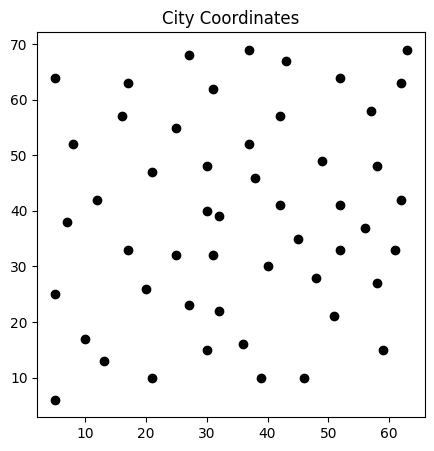

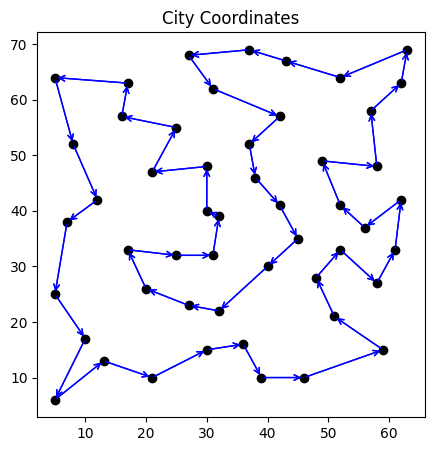

In [4]:
# YQL5Q, ./data/tsp_51_1, solver.py, Traveling Salesman Problem 1
# R9hfg, ./data/tsp_100_3, solver.py, Traveling Salesman Problem 2
# ZVrLp, ./data/tsp_200_2, solver.py, Traveling Salesman Problem 3
# 6tyFn, ./data/tsp_574_1, solver.py, Traveling Salesman Problem 4
# tSpoY, ./data/tsp_1889_1, solver.py, Traveling Salesman Problem 5
# YOVlV, ./data/tsp_33810_1, solver.py, Traveling Salesman Problem 6

def plot_fig(loc,heading="City Coordinates"):
    plt.figure(figsize=(5,5))
    x=[]
    y=[]
    for city in loc:
        x.append(float(city.x))
        y.append(float(city.y))
        plt.title(heading)
    plt.scatter(np.array(x),np.array(y),c='black')
        # break
        
file_location = ".\\data\\tsp_51_1"
# file_location = ".\\data\\tsp_10_1.txt"
with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()

    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))

    plot_fig(points)


    #Solving 
    solution=solve_it(input_data)
    print(solution)
    route= (solution.split('\n')[1]).split()
    route.append('0')
    result = list(zip(route[:-1:1], route[1::1]))
    print("Result: ",result)

    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
    
    for i, j in result:
        # plt.annotate('', xy=[float(city_data[int(j)][0]), float(city_data[int(j)][1])], xytext=[float(city_data[int(i)][0]), float(city_data[int(i)][1])], arrowprops=arrowprops)
        plt.annotate('', xy=[float(points[int(j)].x), float(points[int(j)].y)], xytext=[float(points[int(i)].x), float(points[int(i)].y)], arrowprops=arrowprops)


### Distance Matrix

In [112]:
city_data
coordinates = [[eval(i),eval(j)] for i,j in city_data]
coordinates

[[27, 68],
 [30, 48],
 [43, 67],
 [58, 48],
 [58, 27],
 [37, 69],
 [38, 46],
 [46, 10],
 [61, 33],
 [62, 63],
 [63, 69],
 [32, 22],
 [45, 35],
 [59, 15],
 [5, 6],
 [10, 17],
 [21, 10],
 [5, 64],
 [30, 15],
 [39, 10],
 [32, 39],
 [25, 32],
 [25, 55],
 [48, 28],
 [56, 37],
 [30, 40],
 [37, 52],
 [49, 49],
 [52, 64],
 [20, 26],
 [40, 30],
 [21, 47],
 [17, 63],
 [31, 62],
 [52, 33],
 [51, 21],
 [42, 41],
 [31, 32],
 [5, 25],
 [12, 42],
 [36, 16],
 [52, 41],
 [27, 23],
 [17, 33],
 [13, 13],
 [57, 58],
 [62, 42],
 [42, 57],
 [16, 57],
 [8, 52],
 [7, 38]]

In [120]:
def distance(c1,c2):
    return math.sqrt(math.pow(c1[0]-c2[0],2)+math.pow(c1[1]-c2[1],2))

In [114]:
# Accepts a dictionary of decision variables
def route_finder(decision_variables):
    pass

9.0

### Pyomo Model

In [5]:
Model = pyo.ConcreteModel(name = 'Boutique pottery shop - Model 1')

Model.Discs = pyo.Var(domain = pyo.NonNegativeReals)
Model.Orbs = pyo.Var(domain = pyo.NonNegativeReals)

Model.PeopleHours = pyo.Constraint(expr = 12.50 * Model.Discs + 10.00 * Model.Orbs <= 250)
Model.MaterialUsage = pyo.Constraint(expr = 18.00 * Model.Discs + 30.00 * Model.Orbs <= 500)
Model.SalesRelationship = pyo.Constraint(expr = -2.00 * Model.Discs + 1.00 * Model.Orbs <= 0)

Model.TotalMargin = pyo.Objective(expr = 80.00 * Model.Discs + 200.00 * Model.Orbs, sense = pyo.maximize)

Solver = pyo.SolverFactory('glpk')
# opt = SolverFactory("glpk")
Results = Solver.solve(Model, tee=True, keepfiles=True,logfile = "glpk.csv")

print(Model.name, '\n')
print('Status: ', Results.solver.status, '\n')
print(f'Total margin = ${Model.TotalMargin():,.2f}')
print(f'Production of discs = {Model.Discs():6.2f}')
print(f'Production of orbs  = {Model.Orbs():6.2f}')

Solver log file: 'glpk.csv'
Solver solution file: 'C:\Users\Sakkir\AppData\Local\Temp\tmphtl3nhoz.glpk.raw'
Solver problem files: ('C:\\Users\\Sakkir\\AppData\\Local\\Temp\\tmp_5thlfdq.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\Sakkir\AppData\Local\Temp\tmphtl3nhoz.glpk.raw --wglp C:\Users\Sakkir\AppData\Local\Temp\tmpysif83fp.glpk.glp
 --cpxlp C:\Users\Sakkir\AppData\Local\Temp\tmp_5thlfdq.pyomo.lp
Reading problem data from 'C:\Users\Sakkir\AppData\Local\Temp\tmp_5thlfdq.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to 'C:\Users\Sakkir\AppData\Local\Temp\tmpysif83fp.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer, v4.65
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  3.000e+01  ratio =  3.000e+01
GM: min|aij| =  7.401e-01  max|aij| =  1.351e+00  ratio =  1.826e+00
EQ: min|aij| =  5.477e-01  max

In [129]:
import pyomo.environ as pyo

model = pyo.AbstractModel()

model.m = pyo.Param(within=pyo.NonNegativeIntegers)
model.n = pyo.Param(within=pyo.NonNegativeIntegers)

model.I = pyo.RangeSet(1, model.m)
model.J = pyo.RangeSet(1, model.n)

model.a = pyo.Param(model.I, model.J)
model.b = pyo.Param(model.I)
model.c = pyo.Param(model.J)

# the next line declares a variable indexed by the set J
model.x = pyo.Var(model.J, domain=pyo.NonNegativeReals)

def obj_expression(m):
    return pyo.summation(m.c, m.x)

model.OBJ = pyo.Objective(rule=obj_expression)

def ax_constraint_rule(m, i):
    # return the expression for the constraint for i
    return sum(m.a[i,j] * m.x[j] for j in m.J) >= m.b[i]

# the next line creates one constraint for each member of the set model.I
model.AxbConstraint = pyo.Constraint(model.I, rule=ax_constraint_rule)

In [2]:
solvername='glpk'

solverpath_folder='C:\\glpk\\w64' #does not need to be directly on c drive

solverpath_exe='C:\\glpk\\w64\\glpsol'

sys.path.append(solverpath_folder)

solver=SolverFactory(solvername)

NameError: name 'sys' is not defined

In [159]:
opt = SolverFactory('glpk')

In [1]:
from pyomo.environ import *
# define parameters with data
A = ['hammer', 'wrench', 'screwdriver', 'towel']
b = {'hammer':8, 'wrench':3, 'screwdriver':6, 'towel':11} 
w = {'hammer':5, 'wrench':7, 'screwdriver':4, 'towel':3}
W_max = 14
 
# build concrete model with data specified
model = ConcreteModel()
 
# define variable
model.x = Var( A, within=Binary )
 
# define objective function
model.value = Objective(
    expr = sum( b[i]*model.x[i] for i in A), sense = maximize )
 
# define constraint
model.weight = Constraint(
    expr = sum( w[i]*model.x[i] for i in A) <= W_max )
 
# call solver
opt = SolverFactory('glpk')
# opt = SolverFactory(solvername)
# solver=SolverFactory(solvername,executable=solverpath_exe)
result_obj = opt.solve(model, tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\Sakkir\AppData\Local\Temp\tmp0g8dunc0.glpk.raw --wglp C:\Users\Sakkir\AppData\Local\Temp\tmpfnsmxw7v.glpk.glp
 --cpxlp C:\Users\Sakkir\AppData\Local\Temp\tmpvtnetvxu.pyomo.lp
Reading problem data from 'C:\Users\Sakkir\AppData\Local\Temp\tmpvtnetvxu.pyomo.lp'...
C:\Users\Sakkir\AppData\Local\Temp\tmpvtnetvxu.pyomo.lp:25: warning: lower bound of variable 'x2' redefined
C:\Users\Sakkir\AppData\Local\Temp\tmpvtnetvxu.pyomo.lp:25: warning: upper bound of variable 'x2' redefined
1 row, 4 columns, 4 non-zeros
4 integer variables, all of which are binary
29 lines were read
Writing problem data to 'C:\Users\Sakkir\AppData\Local\Temp\tmpfnsmxw7v.glpk.glp'...
17 lines were written
GLPK Integer Optimizer, v4.65
1 row, 4 columns, 4 non-zeros
4 integer variables, all of which are binary
Preprocessing...
1 constraint coefficient(s) were reduced
1 row, 4 columns, 4 non-zeros
4 integer variables, all of whic

### Route finder

In [25]:
def route_finder(tour):
    route=""
    current=0
    route+=str(current)+" "
    for i in range(len(tour)):
        for path in tour:
            if path[0]==current:
                next=path[1]
                route+=str(next)+" "
                current=next
                break
    return route[:-3]

A= [(0, 33), (1, 31), (2, 5), (3, 45), (4, 8), (5, 0), (6, 36), (7, 13), (8, 46), (9, 10), (10, 28), (11, 42), (12, 30), (13, 35), (14, 44), (15, 14), (16, 18), (17, 49), (18, 40), (19, 7), (20, 25), (21, 37), (22, 48), (23, 34), (24, 41), (25, 1), (26, 6), (27, 3), (28, 2), (29, 43), (30, 11), (31, 22), (32, 17), (33, 47), (34, 4), (35, 23), (36, 12), (37, 20), (38, 15), (39, 50), (40, 19), (41, 27), (42, 29), (43, 21), (44, 16), (45, 9), (46, 24), (47, 26), (48, 32), (49, 39), (50, 38)]
route_finder(A)

'0 33 47 26 6 36 12 30 11 42 29 43 21 37 20 25 1 31 22 48 32 17 49 39 50 38 15 14 44 16 18 40 19 7 13 35 23 34 4 8 46 24 41 27 3 45 9 10 28 2 5'

### Clean up for submission

In [24]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple
from ortools.linear_solver import pywraplp
import itertools
from matplotlib import pyplot as plt
import numpy as np
import time 

Point = namedtuple("Point", ['x', 'y'])

def plot_fig(loc,heading="City Coordinates"):
    plt.figure(figsize=(10,10))
    x=[]
    y=[]
    for city in loc:
        # print (city)
        # x.append(float(city[0]))
        # y.append(float(city[1]))
        x.append(float(city.x))
        y.append(float(city.y))
        plt.title(heading)
    plt.scatter(np.array(x),np.array(y),c='black')
        # break

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def route_finder(tour):
    route=""
    current=0
    route+=str(current)+" "
    for i in range(len(tour)):
        for path in tour:
            if path[0]==current:
                next=path[1]
                route+=str(next)+" "
                current=next
                break
    return route[:-1]

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    # print (points)
    # plot_fig(points)

    start = time.time()

    solver =pywraplp.Solver.CreateSolver('SCIP')
    # solver = pywraplp.Solver('SolveIntegerProblem',
    #                        pywraplp.Solver.GUROBI_MIXED_INTEGER_PROGRAMMING);

    num_cities = len(points)
    
    # Decision Variables for route selection - 1 if route i to j is selected, 0 otherwise 
    x={}
    for i in range (num_cities):
        for j in range(num_cities):
            if i==j: continue
            x[i,j]=solver.IntVar(0, 1, f"x[{i},{j}]")

    # print(x)
    # Decision Variables for cities visited before that city 
    u={}
    infinity=solver.infinity()
    for i in range (1,num_cities):
        u[i]=solver.NumVar(0,infinity , 'u[%i]'%i)
    # print (u)
    
    #Constraints
    #1. Each city should have only one departure
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[i,j])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)
    
    #2. Each city should have only one arrival
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[j,i])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)

    #3. Subtour Elimination constraint
    for i in range(1,num_cities):
        for j in range(1,num_cities):
            if i==j: continue
            solver.Add(u[i]+1 <= u[j] +(num_cities*(1-x[i,j])))
        
    # Objective 
    objective_terms=[]
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            objective_terms.append(x[i,j]*length(points[i],points[j]))
            # print(points[i],points[j],length(points[i],points[j]))
    # print(objective_terms)
            
    solver.Minimize(solver.Sum(objective_terms))
    status =solver.Solve()

    result = []
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            if x[i,j].solution_value() ==1:
            # print (x[i,j].solution_value())
                result.append((i,j))
    # print(result)

    #Visualising Output 
    # arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
    # for i, j in result:
    #     # plt.annotate('', xy=[float(city_data[int(j)][0]), float(city_data[int(j)][1])], xytext=[float(city_data[int(i)][0]), float(city_data[int(i)][1])]
    #     plt.annotate('', xy=[float(points[int(j)].x), float(points[int(j)].y)], xytext=[float(points[int(i)].x), float(points[int(i)].y)], arrowprops=arrowprops)

    # print ('Minimum distance = ', solver.Objective().Value())
    # print("MILP Solution found in: " + str(time.time() - start) + " seconds")
    # # prepare the solution in the specified output format
    obj = solver.Objective().Value()
    output_data = '%.2f' % obj + ' ' + str(1) + '\n'
    # output_data += ' '.join(map(str, solution))
    output_data +=route_finder(result)
    return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        file_location = ".\\data\\tsp_51_1"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


428.87 1
0 33 47 26 6 36 12 30 11 42 29 43 21 37 20 25 1 31 22 48 32 17 49 39 50 38 15 14 44 16 18 40 19 7 13 35 23 34 4 8 46 24 41 27 3 45 9 10 28 2 5 0


### Clean up for Submission 2

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import math
from collections import namedtuple
from ortools.linear_solver import pywraplp
import itertools
from matplotlib import pyplot as plt
import numpy as np
import time 

Point = namedtuple("Point", ['x', 'y'])

def plot_fig(loc,heading="City Coordinates"):
    plt.figure(figsize=(10,10))
    x=[]
    y=[]
    for city in loc:
        # print (city)
        # x.append(float(city[0]))
        # y.append(float(city[1]))
        x.append(float(city.x))
        y.append(float(city.y))
        plt.title(heading)
    plt.scatter(np.array(x),np.array(y),c='black')
        # break

def length(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)

def route_finder(tour):
    route=""
    current=0
    route+=str(current)+" "
    for i in range(len(tour)):
        for path in tour:
            if path[0]==current:
                next=path[1]
                route+=str(next)+" "
                current=next
                break
    return route[:-1]

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])

    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))
    # print (points)
    # plot_fig(points)

    start = time.time()

    solver =pywraplp.Solver.CreateSolver('SCIP')
    # solver = pywraplp.Solver('SolveIntegerProblem',
    #                        pywraplp.Solver.GUROBI_MIXED_INTEGER_PROGRAMMING);

    num_cities = len(points)
    
    # Decision Variables for route selection - 1 if route i to j is selected, 0 otherwise 
    x={}
    for i in range (num_cities):
        for j in range(num_cities):
            if i==j: continue
            x[i,j]=solver.IntVar(0, 1, f"x[{i},{j}]")

    # print(x)
    # Decision Variables for cities visited before that city 
    u={}
    infinity=solver.infinity()
    for i in range (1,num_cities):
        u[i]=solver.NumVar(0,infinity , 'u[%i]'%i)
    # print (u)
    
    #Constraints
    #1. Each city should have only one departure
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[i,j])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)
    
    #2. Each city should have only one arrival
    for i in range(num_cities):
        expr=[]
        for j in range(num_cities):
            if i==j: continue
            expr.append(x[j,i])
        # print(expr)
        solver.Add(sum(expr) <= 1)
        solver.Add(sum(expr) >= 1)

    #3. Subtour Elimination constraint
    for i in range(1,num_cities):
        for j in range(1,num_cities):
            if i==j: continue
            solver.Add(u[i]+1 <= u[j] +(num_cities*(1-x[i,j])))
        
    # Objective 
    objective_terms=[]
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            objective_terms.append(x[i,j]*length(points[i],points[j]))
            # print(points[i],points[j],length(points[i],points[j]))
    # print(objective_terms)
            
    solver.Minimize(solver.Sum(objective_terms))
    status =solver.Solve()

    result = []
    for i in range(num_cities):
        for j in range(num_cities):
            if i==j:continue
            if x[i,j].solution_value() ==1:
            # print (x[i,j].solution_value())
                result.append((i,j))
    # print(result)

    #Visualising Output 
    # arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
    # for i, j in result:
    #     # plt.annotate('', xy=[float(city_data[int(j)][0]), float(city_data[int(j)][1])], xytext=[float(city_data[int(i)][0]), float(city_data[int(i)][1])]
    #     plt.annotate('', xy=[float(points[int(j)].x), float(points[int(j)].y)], xytext=[float(points[int(i)].x), float(points[int(i)].y)], arrowprops=arrowprops)

    # print ('Minimum distance = ', solver.Objective().Value())
    # print("MILP Solution found in: " + str(time.time() - start) + " seconds")
    # # prepare the solution in the specified output format
    obj = solver.Objective().Value()
    output_data = '%.2f' % obj + ' ' + str(1) + '\n'
    # output_data += ' '.join(map(str, solution))
    output_data +=route_finder(result)
    return output_data


import sys

if __name__ == '__main__':
    import sys
    if len(sys.argv) > 1:
        # file_location = sys.argv[1].strip()
        file_location = ".\\data\\tsp_51_1"
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/tsp_51_1)')


428.87 1
0 33 47 26 6 36 12 30 11 42 29 43 21 37 20 25 1 31 22 48 32 17 49 39 50 38 15 14 44 16 18 40 19 7 13 35 23 34 4 8 46 24 41 27 3 45 9 10 28 2 5 0
